In [1]:
from src import analysis_modules
import MDAnalysis as mda
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 25})

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
colours = {"DOPC": "#00dddd",
           "POPC": "#6a6adf",
           "POPE": "#ffb753",
           "DOPE": "#cee051",
           "DOPS": "red",
           "DOPA": "purple"}

In [4]:
out_dir = "figures/Plots/"

# DOPC & POPC

In [5]:
results = "example_results/"

DOPC_POPC_10 = results + "DOPC_POPC_10.csv"

DOPC_POPC_20 = results + "DOPC_POPC_20.csv"

DOPC_POPC_30 = results + "DOPC_POPC_30.csv"

POPC_POPE_10 = results + "POPC_POPE_10.csv"

POPC_POPE_10_10 = results + "POPC_POPE_10_10.csv"

POPC_POPE_20 = results + "POPC_POPE_20.csv"

POPC_POPE_30 = results + "POPC_POPE_30.csv"

# ER5_10 = results + "ER5_10.csv"

# ER5_20 = results + "ER5_20.csv"

# ER5_30 = results + "ER5_30.csv"

In [6]:
# analysis_modules.csv_to_plot(DOPC_POPC_10, ["DOPC", "POPC"], rolling=50, bg=True,\
#                     title="DOPC & POPC Sorting, Radius = 10nm", colours=colours, index_scaling=100, \
#                     x_label = "Microseconds", out=out_dir + "DOPC_POPC_r10.png")

In [7]:
df =  pd.read_csv(DOPC_POPC_30)
print(df)

      Unnamed: 0  DOPC Outer  DOPC Inner  POPC Outer  POPC Inner
0              1        4147        3880        4149        3863
1              2        4122        3905        4172        3840
2              3        4051        3976        4090        3922
3              4        4159        3868        4083        3929
4              5        4119        3908        4139        3873
...          ...         ...         ...         ...         ...
3996        3997        4138        3889        4112        3900
3997        3998        4169        3858        4068        3944
3998        3999        4165        3862        4135        3877
3999        4000        4157        3870        4090        3922
4000        4001        4184        3843        4134        3878

[4001 rows x 5 columns]


<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

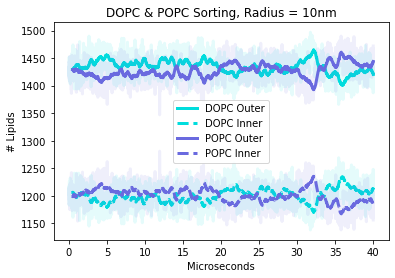

In [8]:
analysis_modules.csv_to_plot(DOPC_POPC_10, ["DOPC", "POPC"], rolling=50, bg=True,\
                    title="DOPC & POPC Sorting, Radius = 10nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds")

/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outer["Outer Total"] = df_outer.sum(axis=1)
/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inner["Inner Total"] = df_inner.sum(axis=1)


<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

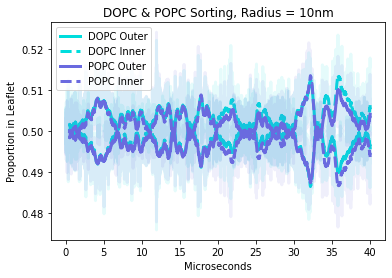

In [9]:
analysis_modules.csv_to_prop_plot(DOPC_POPC_10, ["DOPC", "POPC"], rolling=50, bg=True,\
                    title="DOPC & POPC Sorting, Radius = 10nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds")

<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

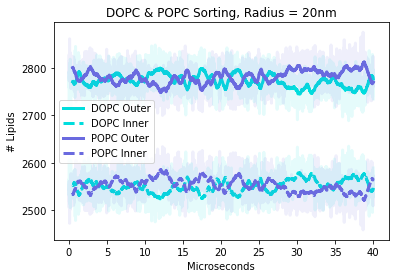

In [10]:
analysis_modules.csv_to_plot(DOPC_POPC_20, ["DOPC", "POPC"], rolling=50, bg = True, title="DOPC & POPC Sorting, Radius = 20nm", colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "DOPC_POPC_r20.png")

/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outer["Outer Total"] = df_outer.sum(axis=1)
/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inner["Inner Total"] = df_inner.sum(axis=1)


<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

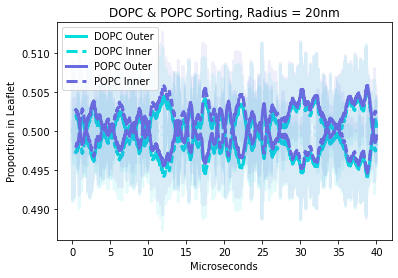

In [11]:
analysis_modules.csv_to_prop_plot(DOPC_POPC_20, ["DOPC", "POPC"], rolling=50, bg=True,\
                    title="DOPC & POPC Sorting, Radius = 20nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds")

<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

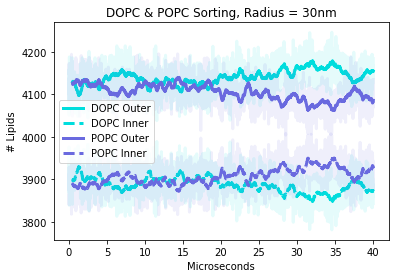

In [12]:
analysis_modules.csv_to_plot(DOPC_POPC_30, ["DOPC", "POPC"], rolling=50, bg = True, title="DOPC & POPC Sorting, Radius = 30nm", colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "DOPC_POPC_r30.png")

/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outer["Outer Total"] = df_outer.sum(axis=1)
/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inner["Inner Total"] = df_inner.sum(axis=1)


<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

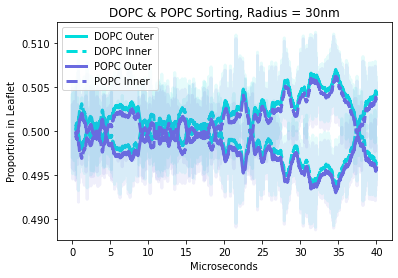

In [13]:
analysis_modules.csv_to_prop_plot(DOPC_POPC_30, ["DOPC", "POPC"], rolling=50, bg=True,\
                    title="DOPC & POPC Sorting, Radius = 30nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds")

<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

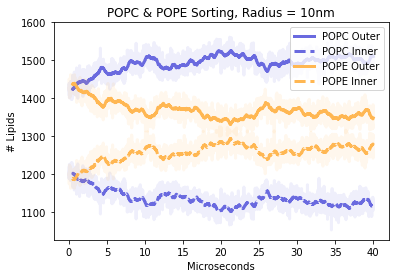

In [14]:
analysis_modules.csv_to_plot(POPC_POPE_10, ["POPC", "POPE"], bg = True, title="POPC & POPE Sorting, Radius = 10nm", rolling=50, colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "POPC_POPE_r10.png")

<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

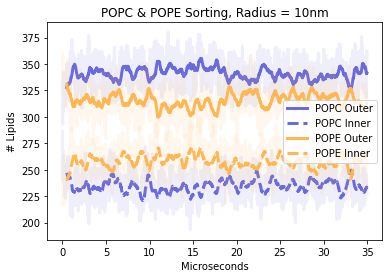

In [15]:
analysis_modules.csv_to_plot(POPC_POPE_10_10, ["POPC", "POPE"], bg = True, title="POPC & POPE Sorting, Radius = 10nm", rolling=50, colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "POPC_POPE_r10_l10.png")

/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outer["Outer Total"] = df_outer.sum(axis=1)
/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inner["Inner Total"] = df_inner.sum(axis=1)


<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

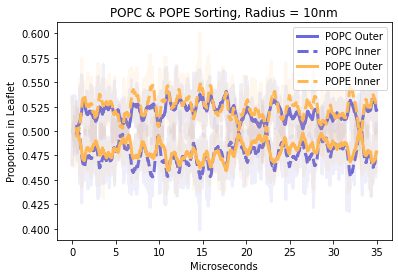

In [16]:
analysis_modules.csv_to_prop_plot(POPC_POPE_10_10, ["POPC", "POPE"], rolling=50, bg=True,\
                    title="POPC & POPE Sorting, Radius = 10nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds", out=out_dir + "POPC_POPE_r10_l10_prop.png")

<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

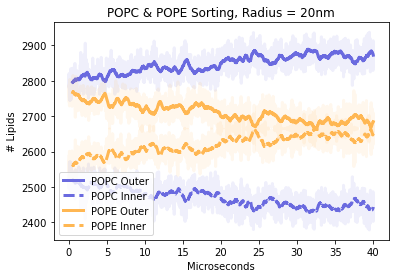

In [17]:
analysis_modules.csv_to_plot(POPC_POPE_20, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 20nm", rolling=50, \
                             bg=True, colours=colours, index_scaling=100, \
                             x_label = "Microseconds", out=out_dir + "POPC_POPE_r20.png")

<module 'matplotlib.pyplot' from '/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/matplotlib/pyplot.py'>

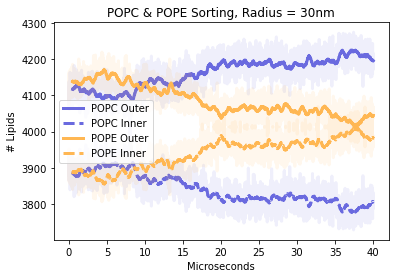

In [18]:
analysis_modules.csv_to_plot(POPC_POPE_30, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 30nm", \
                             rolling=50, bg=True, colours=colours, index_scaling=100, x_label = "Microseconds", \
                             out=out_dir + "POPC_POPE_r30.png")

In [19]:
analysis_modules.csv_to_plot(ER5_10, ["DOPC", "POPC", "DOPE", "DOPS", "DOPA"], rolling=50, bg=True,\
                    title="ER5 Sorting, Radius = 10nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds", out=out_dir + "ER5_r10.png")

NameError: name 'ER5_10' is not defined

In [ ]:
analysis_modules.csv_to_prop_plot(ER5_10, ["DOPC", "POPC", "DOPE", "DOPS", "DOPA"], rolling=50, bg=True,\
                    title="POPC & POPE Sorting, Radius = 10nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds")

In [ ]:
analysis_modules.csv_to_plot(ER5_20, ["DOPC", "POPC", "DOPE", "DOPS", "DOPA"], rolling=50, bg=True,\
                    title="ER5 Sorting, Radius = 20nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds", out=out_dir + "ER5_r20.png")

# Subplot Generation

In [20]:
def csv_to_df_scaleidx(csv, index_scaling):
    df = pd.read_csv(csv)
    df[df.columns[0]] = df[df.columns[0]]/index_scaling
    df = df.set_index(df.columns[0])
    return(df)

In [21]:
DP_10_df = csv_to_df_scaleidx(DOPC_POPC_10, 100)
DP_20_df = csv_to_df_scaleidx(DOPC_POPC_20, 100)
DP_30_df = csv_to_df_scaleidx(DOPC_POPC_30, 100)
PP_10_df = csv_to_df_scaleidx(POPC_POPE_10, 100)
PP_20_df = csv_to_df_scaleidx(POPC_POPE_20, 100)
PP_30_df = csv_to_df_scaleidx(POPC_POPE_30, 100)

dfs = [DP_10_df, DP_20_df, DP_30_df, PP_10_df, PP_20_df, PP_30_df]

In [22]:
def inner_outer_plots(axs, df, resnames, colours):
    for resname in resnames:
        axs.plot(df[str(resname) + " Outer"].rolling(50).mean(), color=colours[resname], linewidth=3, linestyle="-", label= str(resname) + " Outer")
        axs.plot(df[str(resname) + " Inner"].rolling(50).mean(), color=colours[resname], linewidth=3, linestyle=":", label= str(resname) + " Inner")
        
    for resname in resnames:
        axs.plot(df[str(resname) + " Outer"], color=colours[resname], linewidth=3, linestyle="-", alpha=0.1)
        axs.plot(df[str(resname) + " Inner"], color=colours[resname], linewidth=3, linestyle="--", alpha=0.1)

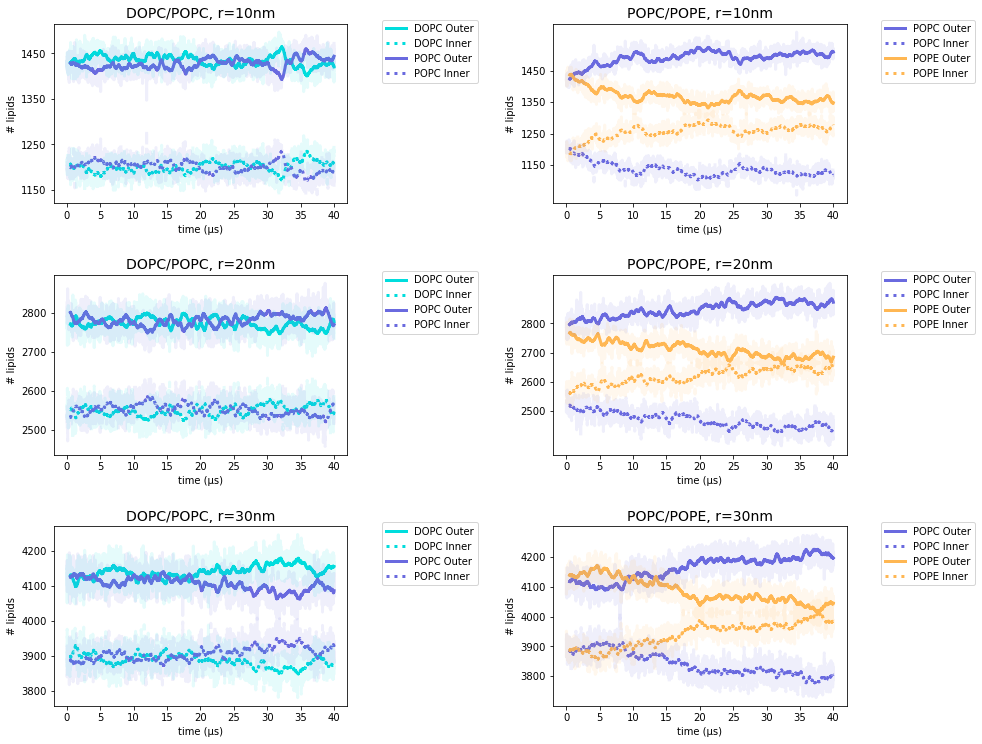

In [23]:
fig, axs = plt.subplots(3,2, figsize=(12, 16))
fig.tight_layout(pad=2.0)
fig.set_size_inches(12, 10)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

plt.subplots_adjust(hspace=0.4, wspace=0.7)

# DOPC/POPC r10
inner_outer_plots(axs[0][0], DP_10_df,["DOPC", "POPC"], colours)
axs[0][0].set_title("DOPC/POPC, r=10nm")
axs[0][0].set_ylabel("# lipids")
axs[0][0].set_xlabel("time (µs)")
axs[0,0].yaxis.set_ticks(np.arange(1150, 1500, 100))
axs[0,0].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner"])

# DOPC/POPC r20
inner_outer_plots(axs[1][0], DP_20_df,["DOPC", "POPC"], colours)
axs[1][0].set_title("DOPC/POPC, r=20nm")
axs[1][0].set_ylabel("# lipids")
axs[1][0].set_xlabel("time (µs)")
axs[1,0].yaxis.set_ticks(np.arange(2500, 2900, 100))
axs[1,0].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner"])

# DOPC/POPC r30
inner_outer_plots(axs[2][0], DP_30_df,["DOPC", "POPC"], colours)
axs[2][0].set_title("DOPC/POPC, r=30nm")
axs[2][0].set_ylabel("# lipids")
axs[2][0].set_xlabel("time (µs)")
axs[2,0].yaxis.set_ticks(np.arange(3800, 4300, 100))
axs[2,0].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner"])

# POPC/POPE r10
inner_outer_plots(axs[0][1], PP_10_df,["POPC", "POPE"], colours)
axs[0][1].set_title("POPC/POPE, r=10nm")
axs[0][1].set_ylabel("# lipids")
axs[0][1].set_xlabel("time (µs)")
axs[0,1].yaxis.set_ticks(np.arange(1150, 1500, 100))
axs[0,1].legend(bbox_to_anchor=(1.1, 1.05),labels=["POPC Outer", "POPC Inner", "POPE Outer", "POPE Inner"])

# POPC/POPE r20
inner_outer_plots(axs[1][1], PP_20_df,["POPC", "POPE"], colours)
axs[1][1].set_title("POPC/POPE, r=20nm")
axs[1][1].set_ylabel("# lipids")
axs[1][1].set_xlabel("time (µs)")
axs[1,1].yaxis.set_ticks(np.arange(2500, 2900, 100))
axs[1,1].legend(bbox_to_anchor=(1.1, 1.05),labels=["POPC Outer", "POPC Inner", "POPE Outer", "POPE Inner"])

# POPC/POPE r30
inner_outer_plots(axs[2][1], PP_30_df,["POPC", "POPE"], colours)
axs[2][1].set_title("POPC/POPE, r=30nm")
axs[2][1].set_ylabel("# lipids")
axs[2][1].set_xlabel("time (µs)")
axs[2,1].yaxis.set_ticks(np.arange(3800, 4300, 100))
axs[2,1].legend(bbox_to_anchor=(1.1, 1.05),labels=["POPC Outer", "POPC Inner", "POPE Outer", "POPE Inner"])

plt.savefig(out_dir + "binary_subplots.png", bbox_inches='tight')

In [24]:
ER5_10_df = csv_to_df_scaleidx(ER5_10, 100)
ER5_20_df = csv_to_df_scaleidx(ER5_20, 100)
ER5_30_df = csv_to_df_scaleidx(ER5_30, 100)

dfs = [ER5_10_df, ER5_20_df, ER5_30_df]

NameError: name 'ER5_10' is not defined

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(12, 16))
fig.tight_layout(pad=2.0)
fig.set_size_inches(12, 10)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

plt.subplots_adjust(hspace=0.4, wspace=0.7)

# ER5 r10
inner_outer_plots(axs[0][0], ER5_10_df,["DOPC", "POPC", "DOPE"], colours)
axs[0][0].set_title("ER5, r=10nm")
axs[0][0].set_ylabel("# lipids")
axs[0][0].set_xlabel("time (µs)")
axs[0,0].yaxis.set_ticks(np.arange(650, 950, 50))
axs[0,0].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner", "DOPE Outer"])

# ER5 r10 2
inner_outer_plots(axs[0][1], ER5_10_df,["DOPS", "DOPA"], colours)
axs[0][1].set_title("ER5, r=10nm")
axs[0][1].set_ylabel("# lipids")
axs[0][1].set_xlabel("time (µs)")
axs[0,1].yaxis.set_ticks(np.arange(110, 160, 10))
axs[0,1].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPS Outer", "DOPS Inner", "DOPA Outer", "DOPA Inner"])

# ER5 r20
inner_outer_plots(axs[1][0], ER5_20_df,["DOPC", "POPC", "DOPE"], colours)
axs[1][0].set_title("ER5, r=20nm")
axs[1][0].set_ylabel("# lipids")
axs[1][0].set_xlabel("time (µs)")
axs[1,0].yaxis.set_ticks(np.arange(1450,1750, 50))
axs[1,0].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner", "DOPE Outer"])

# ER5 r20 2
inner_outer_plots(axs[1][1], ER5_20_df,["DOPS", "DOPA"], colours)
axs[1][1].set_title("ER5, r=20nm")
axs[1][1].set_ylabel("# lipids")
axs[1][1].set_xlabel("time (µs)")
axs[1,1].yaxis.set_ticks(np.arange(250, 285, 10))
axs[1,1].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPS Outer", "DOPS Inner", "DOPA Outer", "DOPA Inner"])


# ER5 r30
inner_outer_plots(axs[2][0], ER5_30_df,["DOPC", "POPC", "DOPE"], colours)
axs[2][0].set_title("ER5, r=30nm")
axs[2][0].set_ylabel("# lipids")
axs[2][0].set_xlabel("time (µs)")
axs[2,0].yaxis.set_ticks(np.arange(2200,2600, 50))
axs[2,0].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner", "DOPE Outer"])

# ER5 r20 2
inner_outer_plots(axs[2][1], ER5_30_df,["DOPS", "DOPA"], colours)
axs[2][1].set_title("ER5, r=30nm")
axs[2][1].set_ylabel("# lipids")
axs[2][1].set_xlabel("time (µs)")
axs[2,1].yaxis.set_ticks(np.arange(350, 440, 10))
axs[2,1].legend(bbox_to_anchor=(1.1, 1.05),labels=["DOPS Outer", "DOPS Inner", "DOPA Outer", "DOPA Inner"])

plt.savefig(out_dir + "ER5_subplots.png", bbox_inches='tight')

## Subplot as proportions

In [25]:
DP_10_df_prop = analysis_modules.df_proportions(DP_10_df)
DP_20_df_prop = analysis_modules.df_proportions(DP_20_df)
DP_30_df_prop = analysis_modules.df_proportions(DP_30_df)

PP_10_df_prop = analysis_modules.df_proportions(PP_10_df)
PP_20_df_prop = analysis_modules.df_proportions(PP_20_df)
PP_30_df_prop = analysis_modules.df_proportions(PP_30_df)

/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outer["Outer Total"] = df_outer.sum(axis=1)
/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inner["Inner Total"] = df_inner.sum(axis=1)
/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

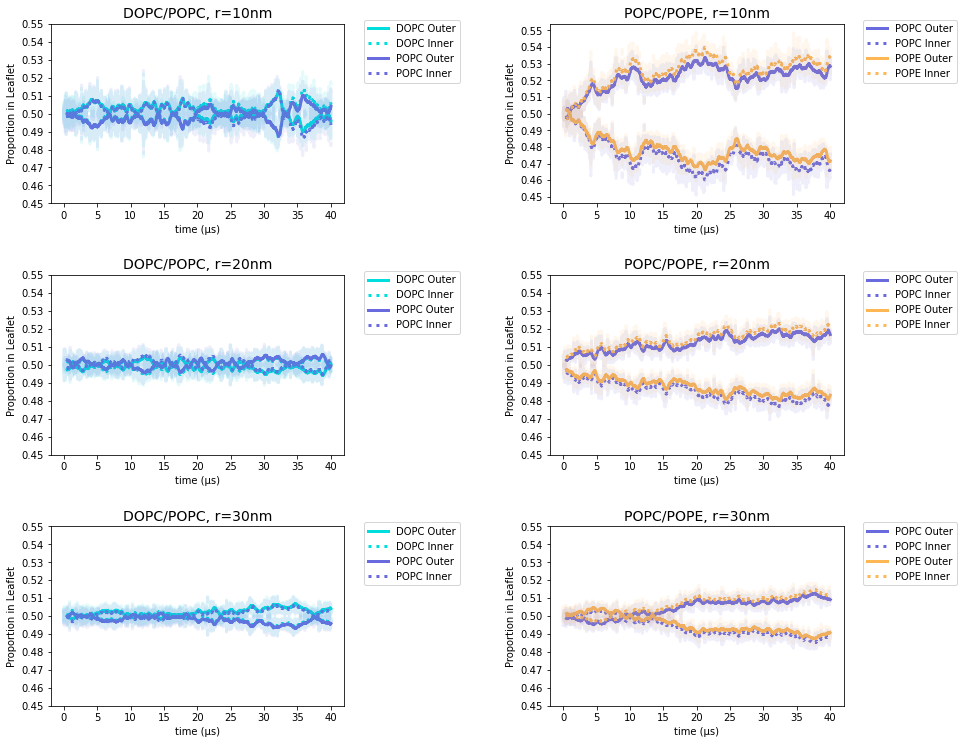

In [26]:
fig, axs = plt.subplots(3,2, figsize=(12, 16))
fig.tight_layout(pad=2.0)
fig.set_size_inches(12, 10)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

plt.subplots_adjust(hspace=0.4, wspace=0.7)

# DOPC/POPC r10
inner_outer_plots(axs[0][0], DP_10_df_prop,["DOPC", "POPC"], colours)
axs[0][0].set_title("DOPC/POPC, r=10nm")
axs[0][0].set_ylabel("Proportion in Leaflet")
axs[0][0].set_xlabel("time (µs)")
axs[0,0].yaxis.set_ticks(np.arange(0.45, 0.55, 0.01))
axs[0,0].legend(bbox_to_anchor=(1.05, 1.05), loc='upper left',labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner"])

# DOPC/POPC r20
inner_outer_plots(axs[1][0], DP_20_df_prop,["DOPC", "POPC"], colours)
axs[1][0].set_title("DOPC/POPC, r=20nm")
axs[1][0].set_ylabel("Proportion in Leaflet")
axs[1][0].set_xlabel("time (µs)")
axs[1,0].yaxis.set_ticks(np.arange(0.45, 0.55, 0.01))
axs[1,0].legend(bbox_to_anchor=(1.05, 1.05), loc='upper left',labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner"])

# DOPC/POPC r30
inner_outer_plots(axs[2][0], DP_30_df_prop,["DOPC", "POPC"], colours)
axs[2][0].set_title("DOPC/POPC, r=30nm")
axs[2][0].set_ylabel("Proportion in Leaflet")
axs[2][0].set_xlabel("time (µs)")
axs[2,0].yaxis.set_ticks(np.arange(0.45, 0.55, 0.01))
axs[2,0].legend(bbox_to_anchor=(1.05, 1.05), loc='upper left',labels=["DOPC Outer", "DOPC Inner", "POPC Outer", "POPC Inner"])

# POPC/POPE r10
inner_outer_plots(axs[0][1], PP_10_df_prop,["POPC", "POPE"], colours)
axs[0][1].set_title("POPC/POPE, r=10nm")
axs[0][1].set_ylabel("Proportion in Leaflet")
axs[0][1].set_xlabel("time (µs)")
axs[0,1].yaxis.set_ticks(np.arange(0.45, 0.55, 0.01))
axs[0,1].legend(bbox_to_anchor=(1.05, 1.05), loc='upper left',labels=["POPC Outer", "POPC Inner", "POPE Outer", "POPE Inner"])

# POPC/POPE r20
inner_outer_plots(axs[1][1], PP_20_df_prop,["POPC", "POPE"], colours)
axs[1][1].set_title("POPC/POPE, r=20nm")
axs[1][1].set_ylabel("Proportion in Leaflet")
axs[1][1].set_xlabel("time (µs)")
axs[1,1].yaxis.set_ticks(np.arange(0.45, 0.55, 0.01))
axs[1,1].legend(bbox_to_anchor=(1.05, 1.05), loc='upper left',labels=["POPC Outer", "POPC Inner", "POPE Outer", "POPE Inner"])

# POPC/POPE r30
inner_outer_plots(axs[2][1], PP_30_df_prop,["POPC", "POPE"], colours)
axs[2][1].set_title("POPC/POPE, r=30nm")
axs[2][1].set_ylabel("Proportion in Leaflet")
axs[2][1].set_xlabel("time (µs)")
axs[2,1].yaxis.set_ticks(np.arange(0.45, 0.55, 0.01))
axs[2,1].legend(bbox_to_anchor=(1.05, 1.05), loc='upper left',labels=["POPC Outer", "POPC Inner", "POPE Outer", "POPE Inner"])

plt.savefig(out_dir + "binary_subplots_proportions.png", bbox_inches='tight')

# Sorting v Force v Radius

In [46]:
# import force data
f_PP_30 = pd.read_csv("/data1/jackson/MD/Membrane_Systems/Tubules/POPC_POPE/r30/energy.csv")
# import radius data
r_PP_30 = pd.read_csv("/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/example_results/radius.PP.30.csv")

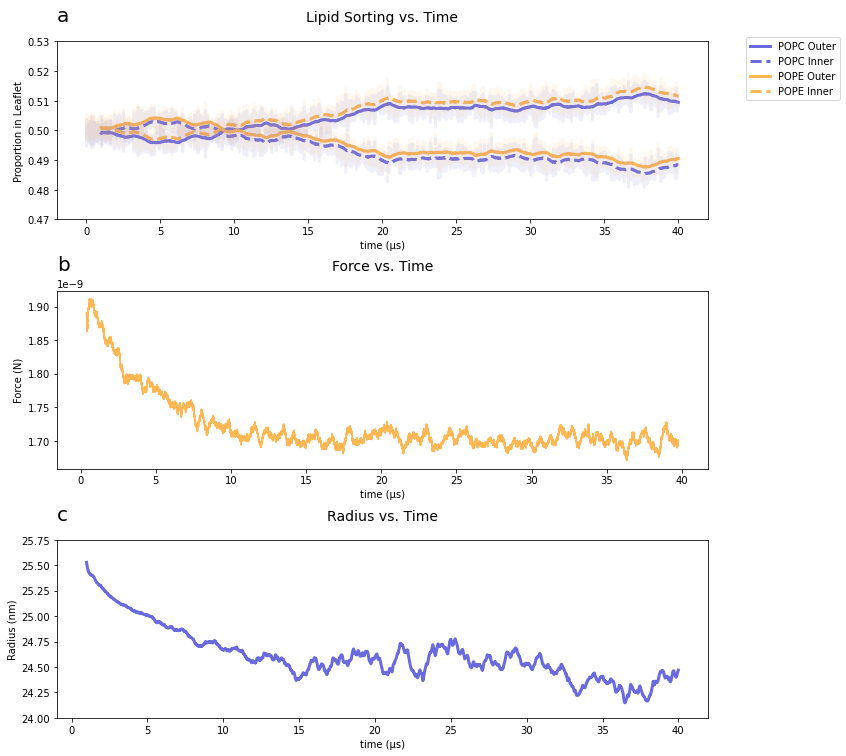

In [86]:
fig, axs = plt.subplots(3,1, figsize=(4, 14))
fig.tight_layout(pad=2.0)
fig.set_size_inches(12, 10)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

plt.subplots_adjust(hspace=0.4, wspace=0.7)
inner_outer_plots(axs[0], PP_30_df_prop,["POPC", "POPE"], colours)
axs[0].set_title("Lipid Sorting vs. Time")
axs[0].set_title("a", loc="left", pad=20, fontsize=20)
axs[0].set_ylabel("Proportion in Leaflet")
axs[0].set_xlabel("time (µs)")
axs[0].yaxis.set_ticks(np.arange(0.47, 0.53, 0.01))
axs[0].legend(bbox_to_anchor=(1.05, 1.05), loc='upper left',labels=["POPC Outer", "POPC Inner", "POPE Outer", "POPE Inner"])


axs[1].plot(f_PP_30["Time (ns)"]/1000, f_PP_30["Force (N)"].rolling(20000).mean(), color="#ffb753")
axs[1].set_title("Force vs. Time")
axs[1].set_title("b", loc="left", pad=20, fontsize=20)
axs[1].set_ylabel("Force (N)")
axs[1].set_xlabel("time (µs)")

axs[2].plot(r_PP_30["Time (µs)"], r_PP_30["Radius (nm)"].rolling(100).mean(), linewidth=3, color="#6a6adf")
axs[2].set_title("Radius vs. Time")
axs[2].set_title("c", loc="left", pad=20, fontsize=20)
axs[2].set_ylabel("Radius (nm)")
axs[2].set_xlabel("time (µs)")
axs[2].yaxis.set_ticks(np.arange(24, 26, 0.25))

plt.savefig(out_dir + "convergence.png", bbox_inches='tight')

/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outer["Outer Total"] = df_outer.sum(axis=1)
/data2/jackson/lipid_sorting/lipid_sorting_in_tubules/src/analysis_modules.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inner["Inner Total"] = df_inner.sum(axis=1)


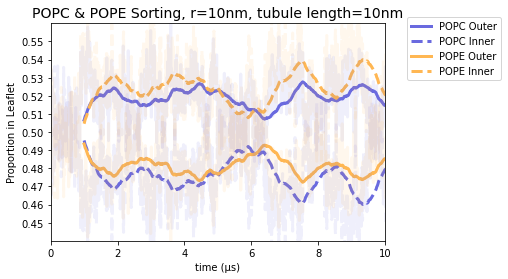

In [27]:
def inner_outer_plots(axs, df, resnames, colours):
    for resname in resnames:
        axs.plot(df[str(resname) + " Outer"].rolling(100).mean(), color=colours[resname], linewidth=3, linestyle="-", label= str(resname) + " Outer")
        axs.plot(df[str(resname) + " Inner"].rolling(100).mean(), color=colours[resname], linewidth=3, linestyle="--", label= str(resname) + " Inner")
        
    for resname in resnames:
        axs.plot(df[str(resname) + " Outer"], color=colours[resname], linewidth=3, linestyle="-", alpha=0.1)
        axs.plot(df[str(resname) + " Inner"], color=colours[resname], linewidth=3, linestyle="--", alpha=0.1)

PP_10_10_df = csv_to_df_scaleidx(POPC_POPE_10_10, 100)
PP_10_10_df_prop = analysis_modules.df_proportions(PP_10_10_df)
fig, axs = plt.subplots(1,1)
inner_outer_plots(axs,PP_10_10_df_prop,["POPC", "POPE"], colours)
axs.set_xlim([0, 10])
axs.set_ylim([0.44, 0.56])
axs.set_title("POPC & POPE Sorting, r=10nm, tubule length=10nm")
axs.set_ylabel("Proportion in Leaflet")
axs.set_xlabel("time (µs)")
axs.yaxis.set_ticks(np.arange(0.45, 0.55, 0.01))
axs.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left',labels=["POPC Outer", "POPC Inner", "POPE Outer", "POPE Inner"])

plt.savefig(out_dir + "POPC_POPE_r10_l10_prop.png", bbox_inches='tight')